In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from acquire import get_titanic_data
from prepare import prep_titanic_data,train_validate_test_split


In [104]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
df = get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df= df.drop(columns=['Unnamed: 0','passenger_id','deck','age','embarked','pclass'])
df['embark_town']= df.embark_town.fillna(value='southampton')
df.head()


,survived,sex,sibsp,parch,fare,class,embark_town,alone
0,0,male,1,0,7.2500,Third,Southampton,0
1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,female,0,0,7.9250,Third,Southampton,1
3,1,female,1,0,53.1000,First,Southampton,0
4,0,male,0,0,8.0500,Third,Southampton,1


In [5]:
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,embark_town_southampton
0,0,1,0,7.2500,0,1,0,1,0,1,0
1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,1,0,1,0
3,1,1,0,53.1000,0,0,0,0,0,1,0
4,0,0,0,8.0500,1,1,0,1,0,1,0


# Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- ### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [6]:
#survival classifier
#yes = negative
#no= positive

# baseline prediction:
df.survived.value_counts()
#0=did not survive, 1=survive


#since number of people survived is outnumbered by no. of deads , so we take dead as baseline prediction


0    549
1    342
Name: survived, dtype: int64

In [10]:
df['baseline']=0
baseline_accuracy= (df.survived== df.baseline).mean()

In [11]:
# baseline accuracy baseline_accuracy=(copy.survived == copy.baseline).mean()
print(f'Baseline Accuracy:{baseline_accuracy:.2%}')

Baseline Accuracy:61.62%


- ### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [19]:
train,validate,test= train_validate_test_split(df, target='survived')
X_train= train.drop(columns=['survived'])
y_train= train.survived

X_validate= validate.drop(columns=['survived'])
y_validate= validate.survived

X_test= test.drop(columns=['survived'])
y_test= test.survived

In [20]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [21]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [22]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- class_Third <= 0.50
|   |   |--- fare <= 28.86
|   |   |   |--- fare <= 28.23
|   |   |   |   |--- class: 1
|   |   |   |--- fare >  28.23
|   |   |   |   |--- class: 0
|   |   |--- fare >  28.86
|   |   |   |--- parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- parch >  1.50
|   |   |   |   |--- class: 1
|   |--- class_Third >  0.50
|   |   |--- fare <= 23.91
|   |   |   |--- embark_town_Queenstown <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- embark_town_Queenstown >  0.50
|   |   |   |   |--- class: 1
|   |   |--- fare >  23.91
|   |   |   |--- parch <= 4.00
|   |   |   |   |--- class: 0
|   |   |   |--- parch >  4.00
|   |   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 18.27
|   |   |--- parch <= 0.50
|   |   |   |--- fare <= 13.25
|   |   |   |   |--- class: 0
|   |   |   |--- fare >  13.25
|   |   |   |   |--- class: 0
|   |   |--- parch >  0.50
|   |   |   |--- fare <= 15.00
|   |   |   |   |--- class: 0
|   |   

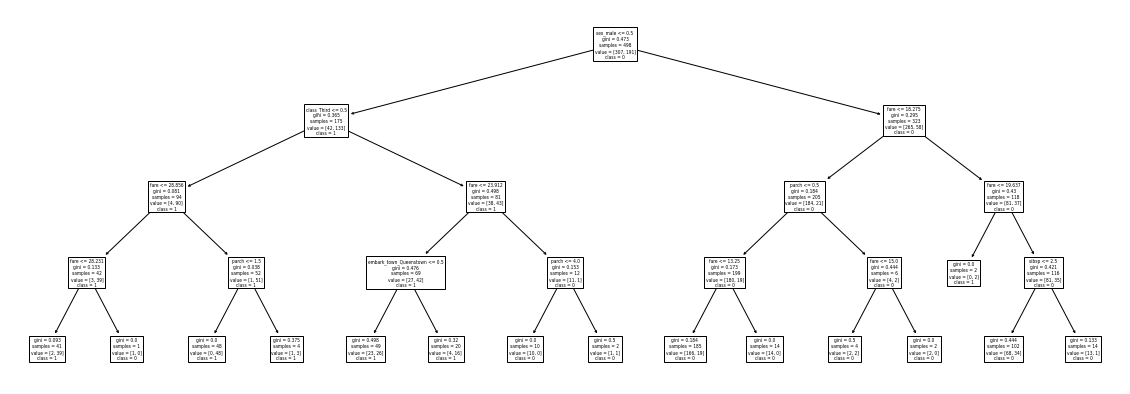

In [29]:
plt.figure(figsize=(20, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [32]:
predictions = tree.predict(X_train)
actual = y_train

In [33]:
confusion_matrix(actual, predictions)

array([[277,  30],
       [ 57, 134]])

In [34]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,277,30
1,57,134


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


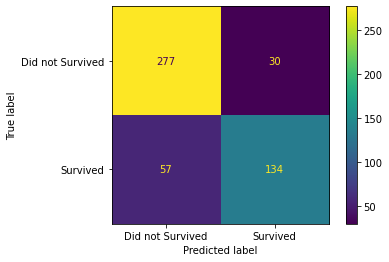

In [35]:
plot_confusion_matrix(tree, X_train, y_train, display_labels=['Did not Survived', 'Survived'])

In [36]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [37]:
TP=269
TN=132
FP=68
FN= 29
accuracy=(TP + TN)/(TP+TN+FP+FN)
recall = (TP)/(TP+TN)
precision = (TP)/(TP+FP)
print("Accuracy is", accuracy)
print("Recall is",round(recall,2))
print("Precision is",round(precision, 2))


Accuracy is 0.8052208835341366
Recall is 0.67
Precision is 0.8


- ### 4.Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [38]:
TN, FP, FN, TP = confusion_matrix(y_train, predictions).ravel()
TN, FP, FN, TP

(277, 30, 57, 134)

In [39]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [40]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


- ### 5.Run through steps 2-4 using a different max_depth value.



In [42]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.828829    0.812121  0.823293    0.820475      0.822421
recall       0.899023    0.701571  0.823293    0.800297      0.823293
f1-score     

- ### 6. Which model performs better on your in-sample data?


depth of 16


- ### 7. Which model performs best on your out-of-sample data, the validate set?

In [43]:
# using loop compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.823293,0.785047,0.038246
3,4,0.825301,0.785047,0.040254
4,5,0.837349,0.761682,0.075667
5,6,0.853414,0.771028,0.082386
6,7,0.875502,0.780374,0.095128
7,8,0.895582,0.771028,0.124554
8,9,0.909639,0.775701,0.133938
9,10,0.917671,0.771028,0.146643


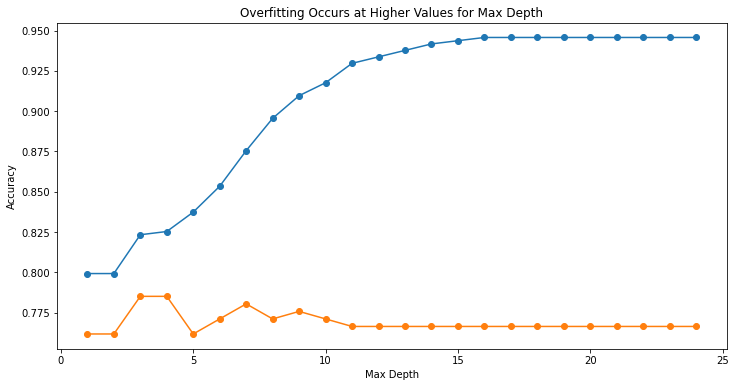

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


# Random Forest Tree Exercise

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [65]:
df=get_titanic_data()
df= df.drop(columns=['Unnamed: 0','passenger_id','deck','age','embarked','pclass'])
df['embark_town']= df.embark_town.fillna(value='Southampton')
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()


,survived,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,7.2500,0,1,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,1,0,1
3,1,1,0,53.1000,0,0,0,0,0,1
4,0,0,0,8.0500,1,1,0,1,0,1


In [66]:
# calling function train_validate_test_split from prepare.py
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

In [80]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [81]:
x_train.head()

,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
583,0,0,40.1250,1,1,0,0,0,0
165,0,2,20.5250,0,1,0,1,0,1
50,4,1,39.6875,0,1,0,1,0,1
259,0,1,26.0000,0,0,1,0,0,1
306,0,0,110.8833,1,0,0,0,0,0


In [82]:
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

In [83]:
# from random forrest
rf= RandomForestClassifier(max_depth =3, random_state=123)
rf

RandomForestClassifier(max_depth=3, random_state=123)

In [84]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.05850702 0.0217272  0.1664738  0.02897307 0.5248539  0.0121386
 0.14446639 0.01492628 0.02793374]


In [85]:
#highest feature value = 0.52 which is the column 'Sex'
# Now making predictions

In [86]:
y_pred= rf.predict(X_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.83


In [88]:
#create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[293  14]
 [ 73 118]]


In [89]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.89      0.62      0.73       191

    accuracy                           0.83       498
   macro avg       0.85      0.79      0.80       498
weighted avg       0.84      0.83      0.82       498



In [90]:
#validate the model
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.80


In [92]:
dframe=[]
for i in range(1,25):
    
    rf= RandomForestClassifier(max_depth =i, random_state=123)
    rf.fit(x_train, y_train)
    y_pred= rf.predict(x_train)
    
    output={"max_depth":i,
    'train_set_accuracy':(rf.score(x_train, y_train)),
    'validate_set_accuracy':(rf.score(X_validate, y_validate))
    }
    
    dframe.append(output)
    
df= pd.DataFrame(dframe)
df['difference']= df['train_set_accuracy']- df['validate_set_accuracy']
df

    

,max_depth,train_set_accuracy,validate_set_accuracy,difference
0,1,0.783133,0.742991,0.040142
1,2,0.815261,0.775701,0.039560
2,3,0.825301,0.803738,0.021563
3,4,0.835341,0.803738,0.031603
4,5,0.853414,0.803738,0.049675
5,6,0.883534,0.808411,0.075123
6,7,0.909639,0.799065,0.110573
7,8,0.923695,0.794393,0.129302
8,9,0.939759,0.785047,0.154712
9,10,0.941767,0.780374,0.161393


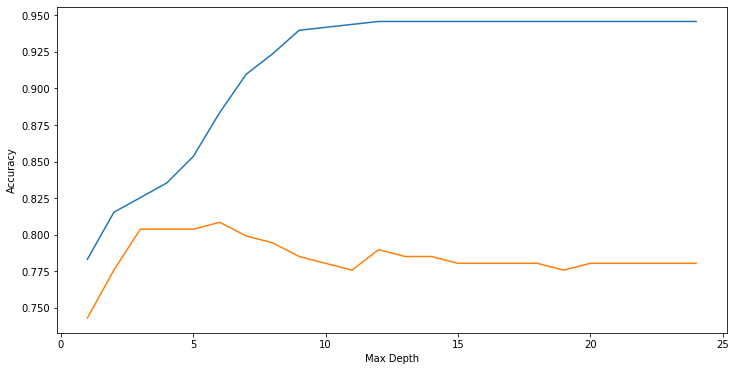

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_set_accuracy)
plt.plot(df.max_depth, df.validate_set_accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


# Increasing min_sample per leaf and decreasing max_depth

In [94]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.901606,0.799065,0.102541
1,3,17,0.875502,0.813084,0.062418
2,4,16,0.871486,0.808411,0.063075
3,5,15,0.853414,0.799065,0.054348
4,6,14,0.837349,0.808411,0.028938
5,7,13,0.841365,0.803738,0.037627
6,8,12,0.835341,0.808411,0.026930
7,9,11,0.837349,0.803738,0.033611
8,10,10,0.833333,0.799065,0.034268
9,11,9,0.831325,0.794393,0.036933


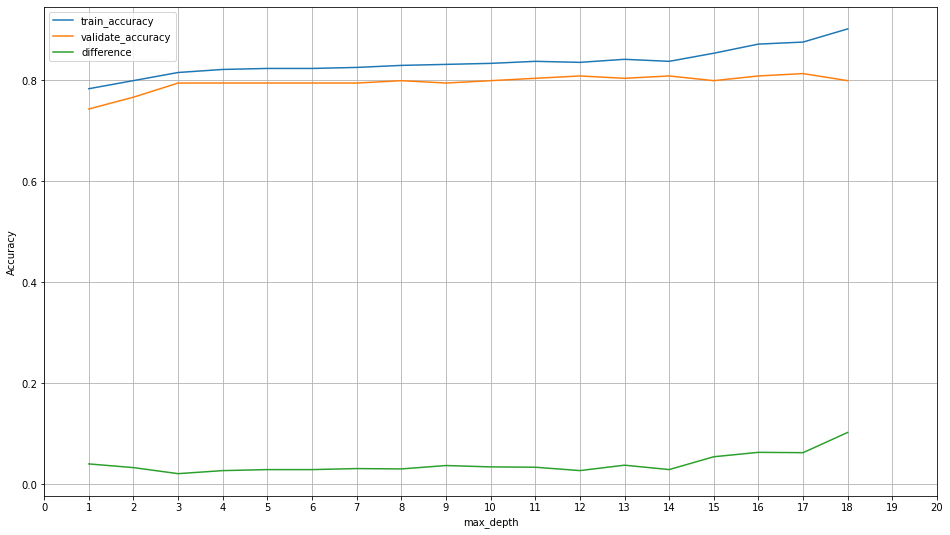

In [95]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()